In [1]:
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
import matplotlib.pyplot as plt 
import seaborn as sns
# matplotlib이 한글을 읽을 수 있도록 변경  
plt.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

#파일을 읽어옴
df = pd.read_excel("./DS.xlsx")

# <군집분석>

### 1. 데이터 전처리
#### 1) '분위수' 관련 column 삭제

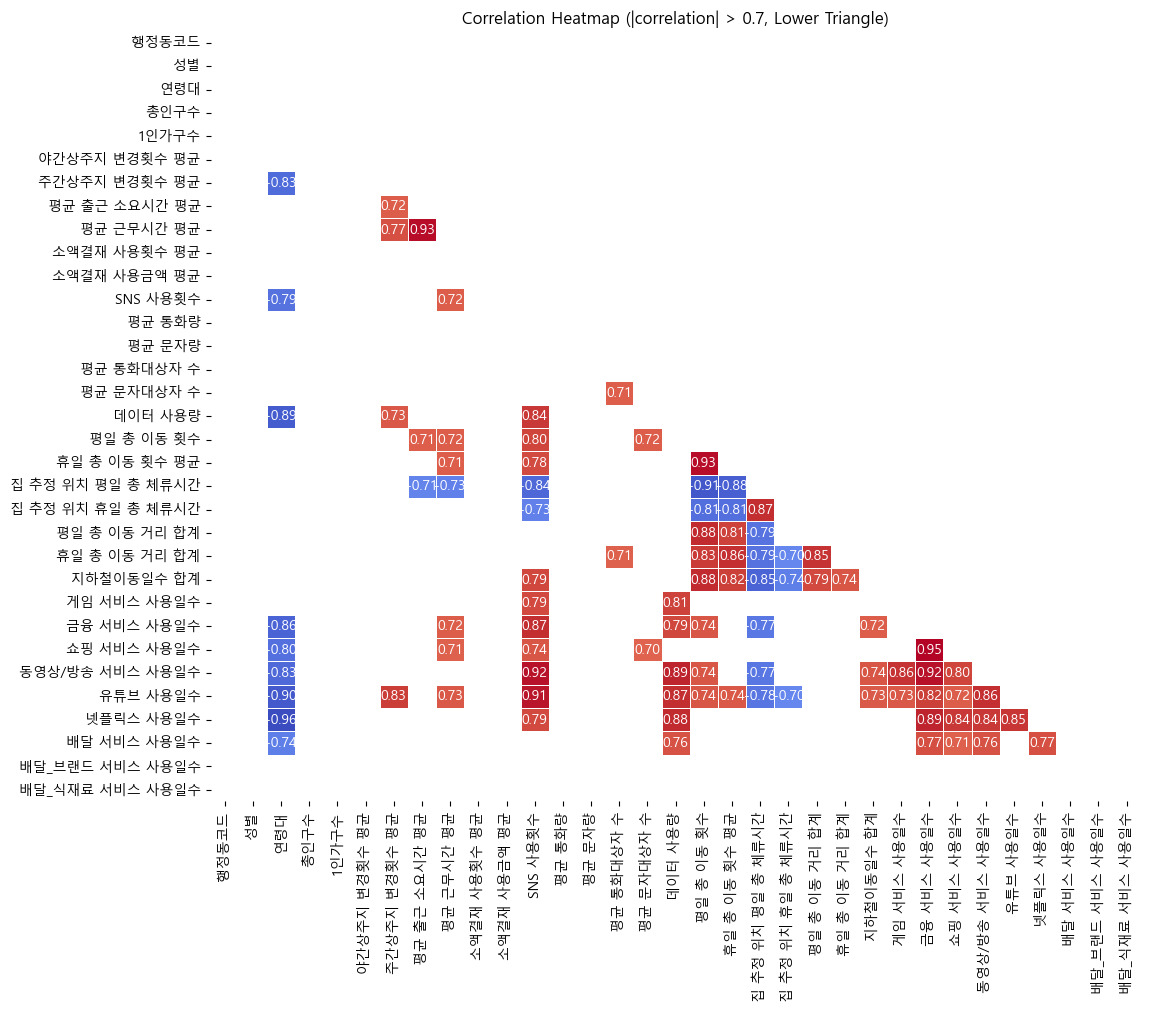

In [2]:
# '분위수'관련 column 삭제
# 추출할 열의 인덱스 리스트 => 구글 문서에 열 이름 별 인덱스 적어놓음!!
column_indices = [0, 3, 4, 5, 6, 8, 13, 18, 23, 28, 33, 39, 43, 47, 51, 55, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139]

# 열 이름 추출
column_names = [df.columns[i] for i in column_indices if i < len(df.columns)]

# 추출된 열들로 새로운 데이터프레임 생성
df_selected = df[column_names]

# 상관행렬 계산
correlation_matrix = df_selected.corr()

# 상위 삼각형 마스킹 배열 생성 => 하위 삼각형만 보기 위해서
mask_upper = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 상관 계수의 절대값이 0.7 이하인 값들을 마스크 처리 => 상관계수 절댓값이 0.7 이상인 것들만 모아 볼 수 있도록
mask_correlation = np.abs(correlation_matrix) < 0.7

# 두 마스크를 결합
mask_combined = mask_upper | mask_correlation

# 마스크된 값을 NaN으로 변환 (히트맵에서 보이지 않도록)
correlation_matrix = correlation_matrix.mask(mask_combined)

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, mask=mask_upper, cbar=False)
plt.title('Correlation Heatmap (|correlation| > 0.7, Lower Triangle)')
plt.show()

- (배달 서비스 사용일수)에 대한 상관계수가 0.7 이상인 것들[column_num]: 연령대[4], 데이터 사용량[59], 금융서비스 사용일수[104], 쇼핑 서비스 사용일수[109], 동영상/방송 서비스 사용일수[114], 넷플릭스 사용일수[124] => 총 6개(4, 59, 104, 109, 114, 124 번째 열)

### 2. K-means 군집 분석

#### 1) 그냥 군집 분석(pca없이) !!!! 연령대만 범주형이라 군집 형성이 이상해짐 -> 연령대 빼고 분석

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터 로드
# data = pd.read_csv('data.csv')

# 필요한 column만 추출
# columns_to_use = [4, 59, 104, 109, 114, 124]
# 연령대 빼기(범주형변수)
columns_to_use = [59, 104, 109, 114, 124]
data_selected = df.iloc[:, columns_to_use]

# 데이터 확인
print(data_selected.head())

   데이터 사용량  금융 서비스 사용일수  쇼핑 서비스 사용일수  동영상/방송 서비스 사용일수  넷플릭스 사용일수
0    15.42       121.57       131.16            37.52      -0.11
1    14.60       157.59       174.06            40.71      -0.13
2    11.35       160.36       179.52            38.28      -0.18
3     8.32       156.83       181.48            38.16      -0.21
4     7.64       152.46       184.11            35.32      -0.20


c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\

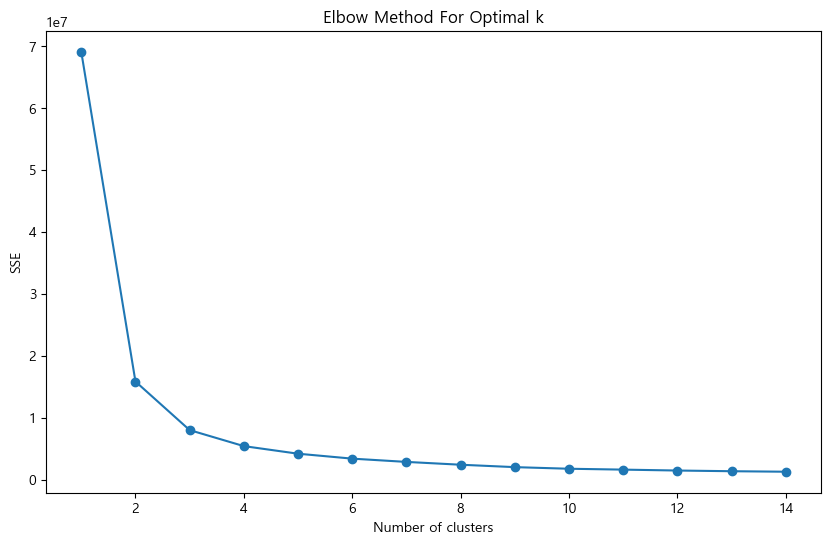

c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\

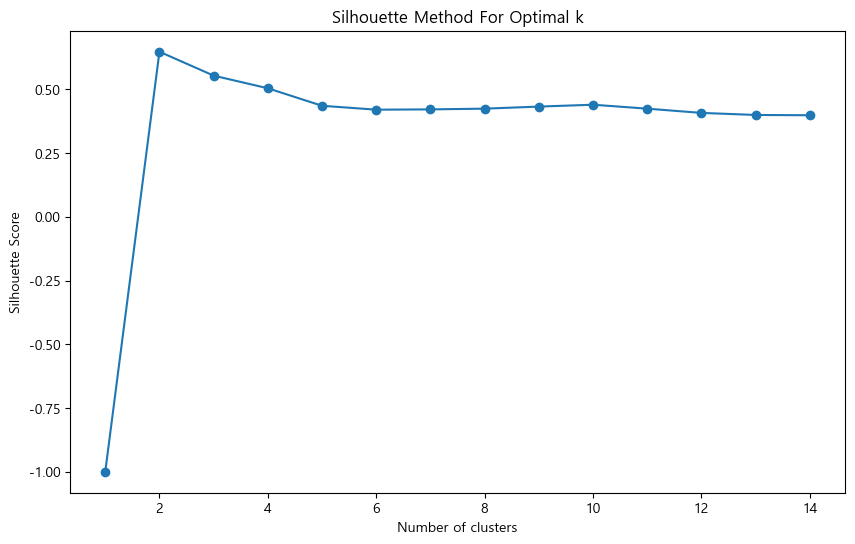

Optimal number of clusters: 2


In [4]:
# 엘보우 방법을 사용하여 최적의 k 값 찾기
sse = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_selected)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

# 실루엣 방법을 사용하여 최적의 k 값 찾기
silhouette_scores = []

for k in k_range:
    if k == 1:
        silhouette_scores.append(-1)
    else:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        labels = kmeans.fit_predict(data_selected)
        silhouette_scores.append(silhouette_score(data_selected, labels))

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

# 최적의 k 값 선택 (예: 실루엣 스코어가 가장 높은 k 값)
best_k = np.argmax(silhouette_scores) + 1
print(f'Optimal number of clusters: {best_k}')


- 엘보우, 실루엣 결과 확인-> k = 2, 3비교

c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hk-Lee\AppData\Local\Temp\ipykernel_22012\1168840967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['cluster_k2'] = kmeans_k2.fit_predict(data_selected)


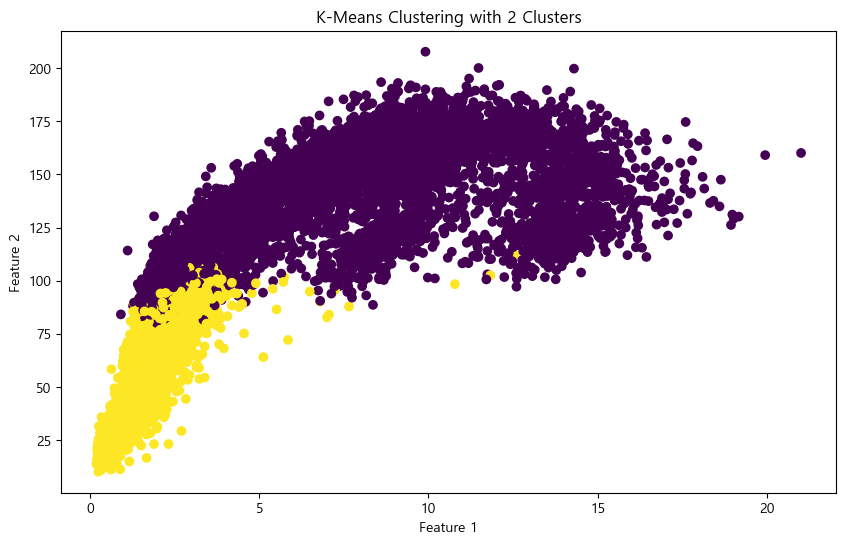

In [7]:
# 최적의 k 값을 사용하여 k-means++ 클러스터링 수행
kmeans_k2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
data_selected['cluster_k2'] = kmeans_k2.fit_predict(data_selected)

# 클러스터링 결과 시각화 (첫 두 특성만 사용하여 2D 시각화)
plt.figure(figsize=(10, 6))
plt.scatter(data_selected.iloc[:, 0], data_selected.iloc[:, 1], c=data_selected['cluster_k2'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering with 2 Clusters')
plt.show()

In [8]:
# 클러스터 라벨을 원본 데이터에 추가
data_selected['cluster'] = kmeans_k2

# 각 클러스터의 속성별 평균 계산
cluster_means = data_selected.groupby('cluster').mean()

# 결과 출력
print(cluster_means)

                                        데이터 사용량  금융 서비스 사용일수  쇼핑 서비스 사용일수  \
cluster                                                                     
KMeans(n_clusters=2, random_state=42)  5.450689   104.654724   141.594513   

                                       동영상/방송 서비스 사용일수  넷플릭스 사용일수  cluster_k2  
cluster                                                                        
KMeans(n_clusters=2, random_state=42)        27.602072  -0.398102    0.378734  


C:\Users\hk-Lee\AppData\Local\Temp\ipykernel_22012\2868379008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['cluster'] = kmeans_k2


#### 2) pca하고 군집 분석

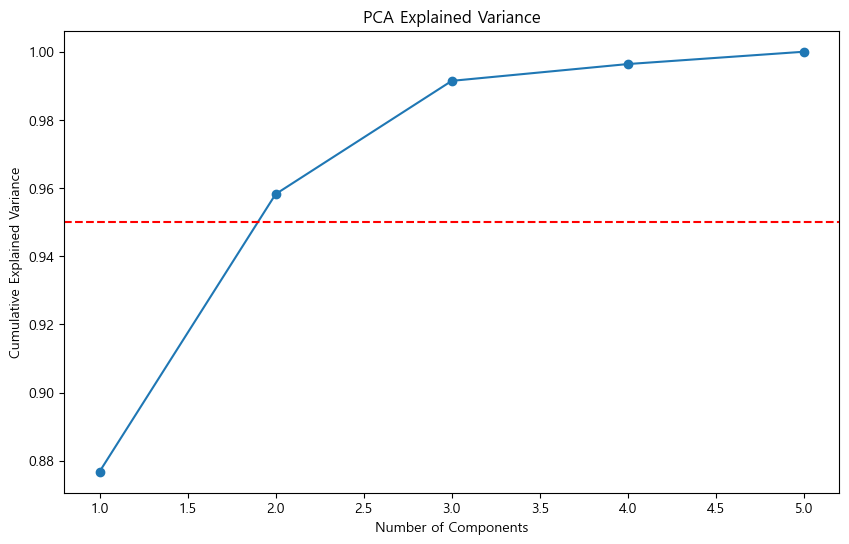

Optimal number of PCA components: 2


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# 필요한 column만 추출
columns_to_use = [59, 104, 109, 114, 124]
data_selected = df.iloc[:, columns_to_use]

# 데이터 스케일링 (PCA 전에 스케일링이 필요)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# PCA 수행
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

# 설명된 분산 비율 누적 합 계산
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 최적의 주성분 수 찾기 (설명된 분산 비율이 95% 이상이 되는 최소 주성분 수)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1

# PCA 결과 시각화 (설명된 분산 비율)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

print(f'Optimal number of PCA components: {optimal_components}')

c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\

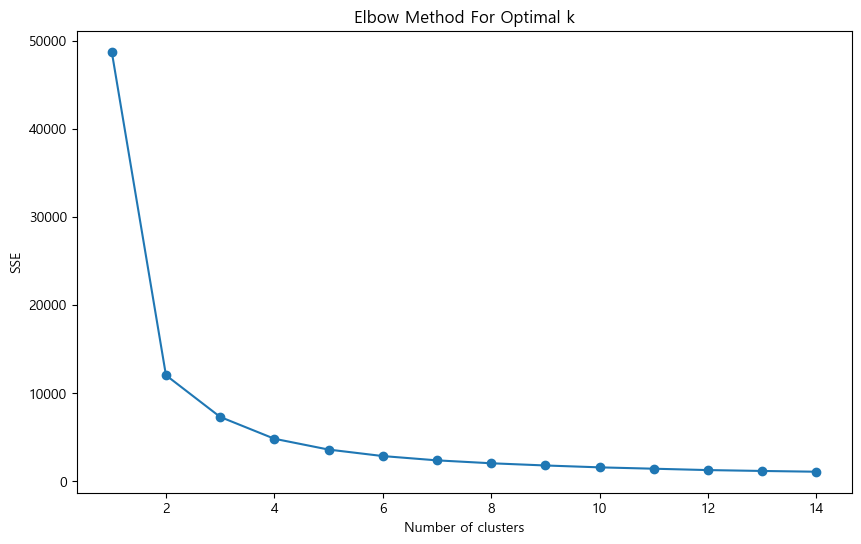

c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\

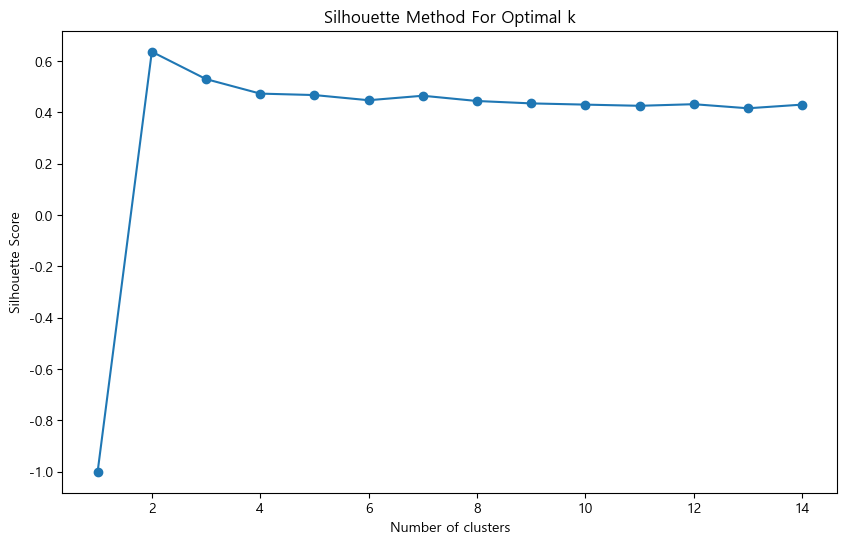

Optimal number of clusters: 2


In [10]:
# 최적의 주성분 수로 PCA 재수행
pca = PCA(n_components=optimal_components)
pca_data_optimal = pca.fit_transform(data_scaled)

# 엘보우 방법을 사용하여 최적의 k 값 찾기
sse = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pca_data_optimal)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

# 실루엣 방법을 사용하여 최적의 k 값 찾기
silhouette_scores = []

for k in k_range:
    if k == 1:
        silhouette_scores.append(-1)
    else:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        labels = kmeans.fit_predict(pca_data_optimal)
        silhouette_scores.append(silhouette_score(pca_data_optimal, labels))

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

# 최적의 k 값 선택 (예: 실루엣 스코어가 가장 높은 k 값)
best_k = np.argmax(silhouette_scores) + 1
print(f'Optimal number of clusters: {best_k}')

c:\users\hk-lee\appdata\local\programs\python\python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


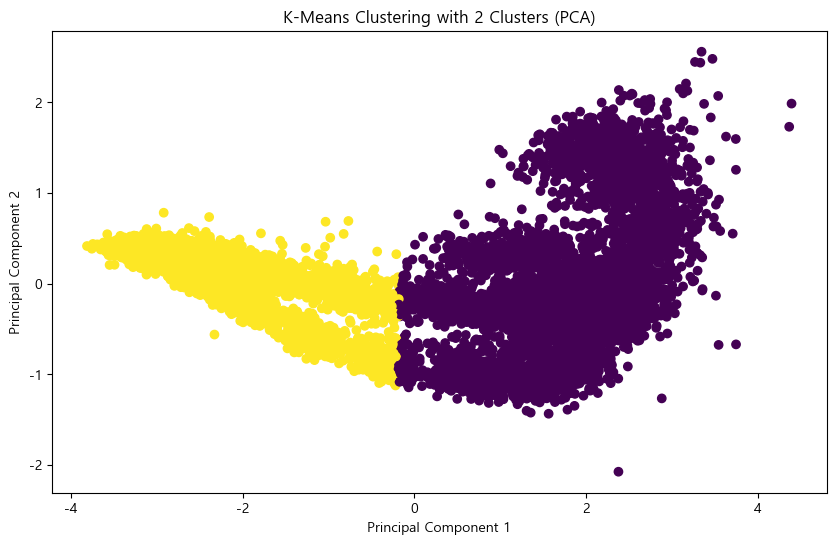

In [13]:
# 최적의 k 값을 사용하여 k-means++ 클러스터링 수행
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
kmeans_k2_pca = kmeans.fit_predict(pca_data_optimal)

# 클러스터링 결과 시각화 (첫 두 주성분만 사용하여 2D 시각화)
plt.figure(figsize=(10, 6))
plt.scatter(pca_data_optimal[:, 0], pca_data_optimal[:, 1], c=kmeans_k2_pca, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering with {best_k} Clusters (PCA)')
plt.show()

In [14]:
# 클러스터 라벨을 원본 데이터에 추가
data_selected['cluster'] = kmeans_k2_pca

# 각 클러스터의 속성별 평균 계산
cluster_means = data_selected.groupby('cluster').mean()

# 결과 출력
print(cluster_means)

          데이터 사용량  금융 서비스 사용일수  쇼핑 서비스 사용일수  동영상/방송 서비스 사용일수  넷플릭스 사용일수
cluster                                                                
0        8.667828   144.366336   190.524365        35.296197  -0.239093
1        1.564854    56.688887    82.494385        18.308690  -0.590163


C:\Users\hk-Lee\AppData\Local\Temp\ipykernel_22012\516604907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['cluster'] = kmeans_k2_pca
